In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
merge_df=pd.read_csv('/content/sample_data/GlobalLandTemperaturesByCity.csv', sep=',')
merge_df.head(5)

dt  AverageTemperature  ...  Latitude Longitude
0  1743-11-01               6.068  ...    57.05N    10.33E
1  1743-12-01                 NaN  ...    57.05N    10.33E
2  1744-01-01                 NaN  ...    57.05N    10.33E
3  1744-02-01                 NaN  ...    57.05N    10.33E
4  1744-03-01                 NaN  ...    57.05N    10.33E

[5 rows x 7 columns]

In [ ]:
df1= merge_df.loc[merge_df.City =='Paris']
df1

dt  AverageTemperature  ...  Latitude Longitude
5699279  1743-11-01               7.648  ...    49.03N     2.45E
5699280  1743-12-01                 NaN  ...    49.03N     2.45E
5699281  1744-01-01                 NaN  ...    49.03N     2.45E
5699282  1744-02-01                 NaN  ...    49.03N     2.45E
5699283  1744-03-01                 NaN  ...    49.03N     2.45E
...             ...                 ...  ...       ...       ...
5702513  2013-05-01              11.703  ...    49.03N     2.45E
5702514  2013-06-01              16.340  ...    49.03N     2.45E
5702515  2013-07-01              21.186  ...    49.03N     2.45E
5702516  2013-08-01              19.235  ...    49.03N     2.45E
5702517  2013-09-01                 NaN  ...    49.03N     2.45E

[3239 rows x 7 columns]

In [ ]:
df1['dt'] = pd.DatetimeIndex(df1['dt'])
df1.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df1= df1.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df1

ds       y  ...  Latitude Longitude
5699279 1743-11-01   7.648  ...    49.03N     2.45E
5699280 1743-12-01     NaN  ...    49.03N     2.45E
5699281 1744-01-01     NaN  ...    49.03N     2.45E
5699282 1744-02-01     NaN  ...    49.03N     2.45E
5699283 1744-03-01     NaN  ...    49.03N     2.45E
...            ...     ...  ...       ...       ...
5702513 2013-05-01  11.703  ...    49.03N     2.45E
5702514 2013-06-01  16.340  ...    49.03N     2.45E
5702515 2013-07-01  21.186  ...    49.03N     2.45E
5702516 2013-08-01  19.235  ...    49.03N     2.45E
5702517 2013-09-01     NaN  ...    49.03N     2.45E

[3239 rows x 7 columns]

In [ ]:
df1 = df1.rename(columns={'dt': 'ds','y': 'y'})
df1.head(5)

ds      y  ...  Latitude Longitude
5699279 1743-11-01  7.648  ...    49.03N     2.45E
5699280 1743-12-01    NaN  ...    49.03N     2.45E
5699281 1744-01-01    NaN  ...    49.03N     2.45E
5699282 1744-02-01    NaN  ...    49.03N     2.45E
5699283 1744-03-01    NaN  ...    49.03N     2.45E

[5 rows x 7 columns]

In [ ]:
m = Prophet()
m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  17.273682   15.411619   19.244162
3595 2014-08-24  17.176985   15.123219   19.259959
3596 2014-08-25  17.078444   15.046002   18.987297
3597 2014-08-26  16.977947   15.000176   19.111679
3598 2014-08-27  16.875439   14.691742   18.792944

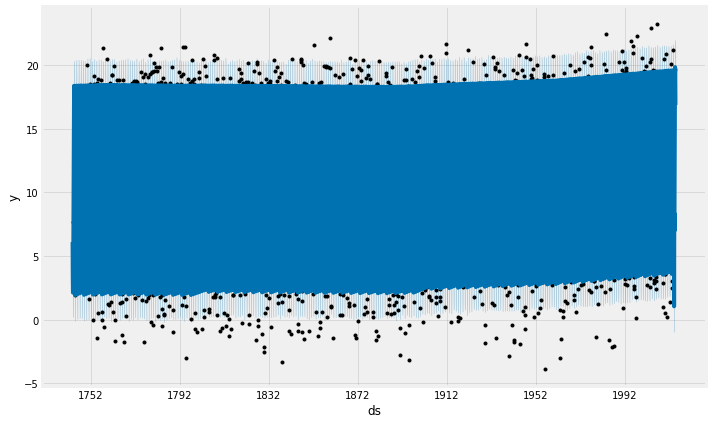

In [ ]:
fig1 = m.plot(forecast)

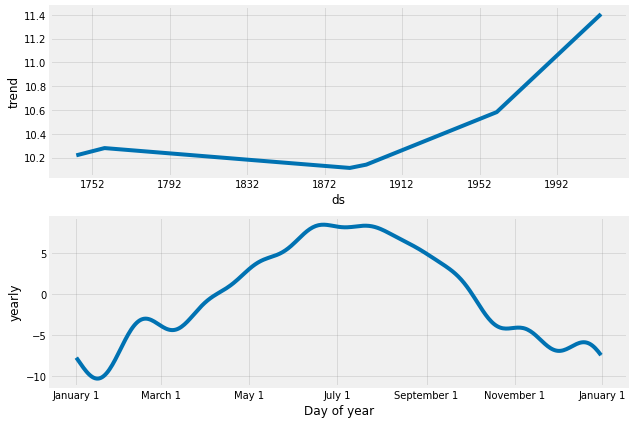

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
df2= merge_df.loc[merge_df.City =='Rennes']
df2

dt  AverageTemperature  ...  Latitude Longitude
6312696  1743-11-01               8.043  ...    47.42N     1.18W
6312697  1743-12-01                 NaN  ...    47.42N     1.18W
6312698  1744-01-01                 NaN  ...    47.42N     1.18W
6312699  1744-02-01                 NaN  ...    47.42N     1.18W
6312700  1744-03-01                 NaN  ...    47.42N     1.18W
...             ...                 ...  ...       ...       ...
6315930  2013-05-01              12.345  ...    47.42N     1.18W
6315931  2013-06-01              16.829  ...    47.42N     1.18W
6315932  2013-07-01              21.862  ...    47.42N     1.18W
6315933  2013-08-01              19.717  ...    47.42N     1.18W
6315934  2013-09-01                 NaN  ...    47.42N     1.18W

[3239 rows x 7 columns]

In [ ]:
df2['dt'] = pd.DatetimeIndex(df2['dt'])
df2.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df2= df2.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df2

ds       y  ...  Latitude Longitude
6312696 1743-11-01   8.043  ...    47.42N     1.18W
6312697 1743-12-01     NaN  ...    47.42N     1.18W
6312698 1744-01-01     NaN  ...    47.42N     1.18W
6312699 1744-02-01     NaN  ...    47.42N     1.18W
6312700 1744-03-01     NaN  ...    47.42N     1.18W
...            ...     ...  ...       ...       ...
6315930 2013-05-01  12.345  ...    47.42N     1.18W
6315931 2013-06-01  16.829  ...    47.42N     1.18W
6315932 2013-07-01  21.862  ...    47.42N     1.18W
6315933 2013-08-01  19.717  ...    47.42N     1.18W
6315934 2013-09-01     NaN  ...    47.42N     1.18W

[3239 rows x 7 columns]

In [ ]:
df2= df2.rename(columns={'dt': 'ds','y': 'y'})
df2.head(5)

ds      y  ...  Latitude Longitude
6312696 1743-11-01  8.043  ...    47.42N     1.18W
6312697 1743-12-01    NaN  ...    47.42N     1.18W
6312698 1744-01-01    NaN  ...    47.42N     1.18W
6312699 1744-02-01    NaN  ...    47.42N     1.18W
6312700 1744-03-01    NaN  ...    47.42N     1.18W

[5 rows x 7 columns]

In [ ]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  18.126459   16.331051   19.859990
3595 2014-08-24  18.018592   16.344192   19.733117
3596 2014-08-25  17.905946   16.181827   19.643484
3597 2014-08-26  17.788911   16.206537   19.362037
3598 2014-08-27  17.668000   15.895001   19.402882

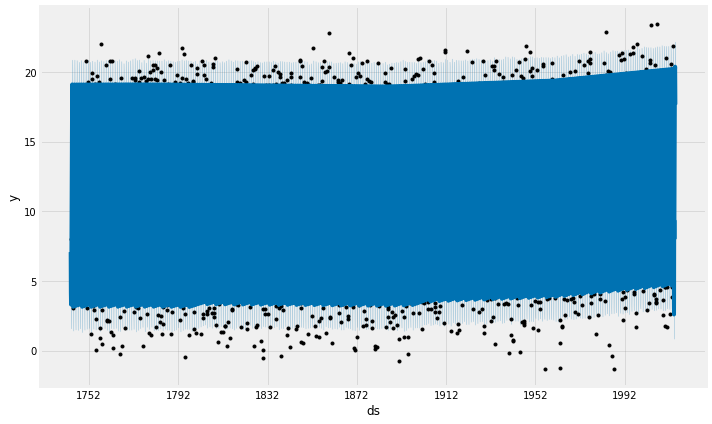

In [ ]:
fig1 = m.plot(forecast)

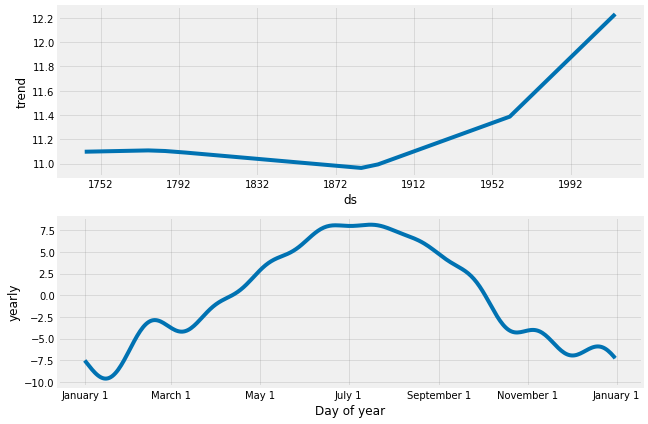

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
df3= merge_df.loc[merge_df.City =='Nice']
df3

dt  AverageTemperature  ...  Latitude Longitude
5241159  1743-11-01               5.096  ...    44.20N     6.71E
5241160  1743-12-01                 NaN  ...    44.20N     6.71E
5241161  1744-01-01                 NaN  ...    44.20N     6.71E
5241162  1744-02-01                 NaN  ...    44.20N     6.71E
5241163  1744-03-01                 NaN  ...    44.20N     6.71E
...             ...                 ...  ...       ...       ...
5244393  2013-05-01              10.977  ...    44.20N     6.71E
5244394  2013-06-01              16.441  ...    44.20N     6.71E
5244395  2013-07-01              21.092  ...    44.20N     6.71E
5244396  2013-08-01              19.737  ...    44.20N     6.71E
5244397  2013-09-01                 NaN  ...    44.20N     6.71E

[3239 rows x 7 columns]

In [ ]:
df3['dt'] = pd.DatetimeIndex(df3['dt'])
df3.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df3= df3.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df3

ds       y  ...  Latitude Longitude
5241159 1743-11-01   5.096  ...    44.20N     6.71E
5241160 1743-12-01     NaN  ...    44.20N     6.71E
5241161 1744-01-01     NaN  ...    44.20N     6.71E
5241162 1744-02-01     NaN  ...    44.20N     6.71E
5241163 1744-03-01     NaN  ...    44.20N     6.71E
...            ...     ...  ...       ...       ...
5244393 2013-05-01  10.977  ...    44.20N     6.71E
5244394 2013-06-01  16.441  ...    44.20N     6.71E
5244395 2013-07-01  21.092  ...    44.20N     6.71E
5244396 2013-08-01  19.737  ...    44.20N     6.71E
5244397 2013-09-01     NaN  ...    44.20N     6.71E

[3239 rows x 7 columns]

In [ ]:
m = Prophet()
m.fit(df3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  16.624723   14.932821   18.227011
3595 2014-08-24  16.519049   14.894421   18.416226
3596 2014-08-25  16.416908   14.840902   18.015840
3597 2014-08-26  16.317699   14.656406   17.995714
3598 2014-08-27  16.220758   14.563278   18.015927

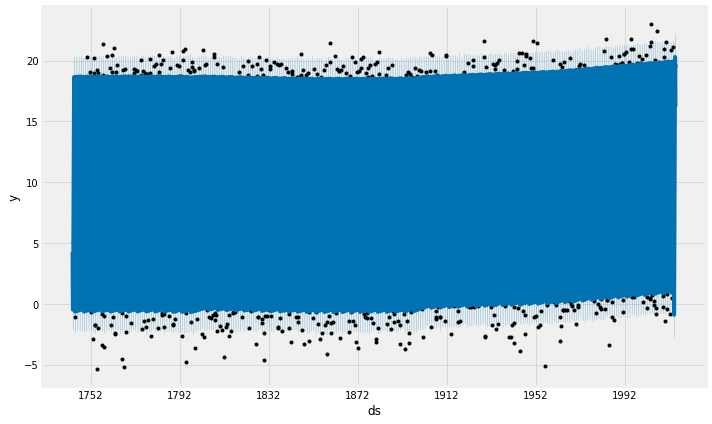

In [ ]:
fig3 = m.plot(forecast)

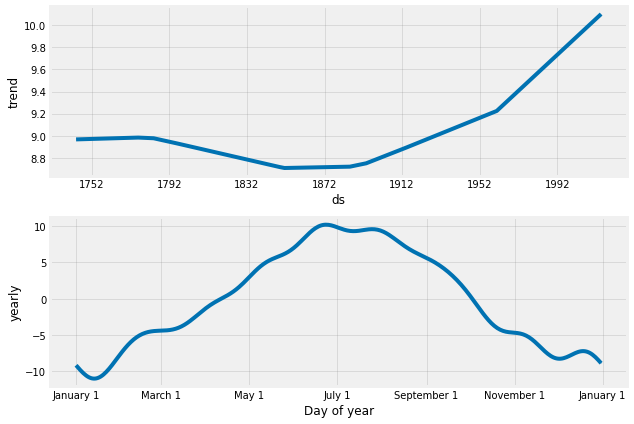

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
df4= merge_df.loc[merge_df.City =='Lyon']
df4

dt  AverageTemperature  ...  Latitude Longitude
4435017  1743-11-01               4.858  ...    45.81N     5.77E
4435018  1743-12-01                 NaN  ...    45.81N     5.77E
4435019  1744-01-01                 NaN  ...    45.81N     5.77E
4435020  1744-02-01                 NaN  ...    45.81N     5.77E
4435021  1744-03-01                 NaN  ...    45.81N     5.77E
...             ...                 ...  ...       ...       ...
4438251  2013-05-01              10.477  ...    45.81N     5.77E
4438252  2013-06-01              15.970  ...    45.81N     5.77E
4438253  2013-07-01              20.531  ...    45.81N     5.77E
4438254  2013-08-01              18.633  ...    45.81N     5.77E
4438255  2013-09-01                 NaN  ...    45.81N     5.77E

[3239 rows x 7 columns]

In [ ]:
df4['dt'] = pd.DatetimeIndex(df4['dt'])
df4.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df4= df4.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df4

ds       y  ...  Latitude Longitude
4435017 1743-11-01   4.858  ...    45.81N     5.77E
4435018 1743-12-01     NaN  ...    45.81N     5.77E
4435019 1744-01-01     NaN  ...    45.81N     5.77E
4435020 1744-02-01     NaN  ...    45.81N     5.77E
4435021 1744-03-01     NaN  ...    45.81N     5.77E
...            ...     ...  ...       ...       ...
4438251 2013-05-01  10.477  ...    45.81N     5.77E
4438252 2013-06-01  15.970  ...    45.81N     5.77E
4438253 2013-07-01  20.531  ...    45.81N     5.77E
4438254 2013-08-01  18.633  ...    45.81N     5.77E
4438255 2013-09-01     NaN  ...    45.81N     5.77E

[3239 rows x 7 columns]

In [ ]:
m = Prophet()
m.fit(df4)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  16.187591   14.311501   18.119854
3595 2014-08-24  16.078256   13.994596   17.978565
3596 2014-08-25  15.966735   13.985953   17.789685
3597 2014-08-26  15.852597   13.891341   17.661889
3598 2014-08-27  15.735482   13.800657   17.494405

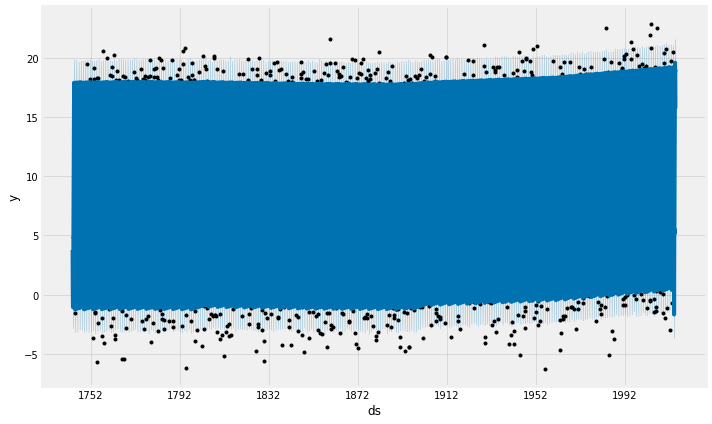

In [ ]:
fig4= m.plot(forecast)

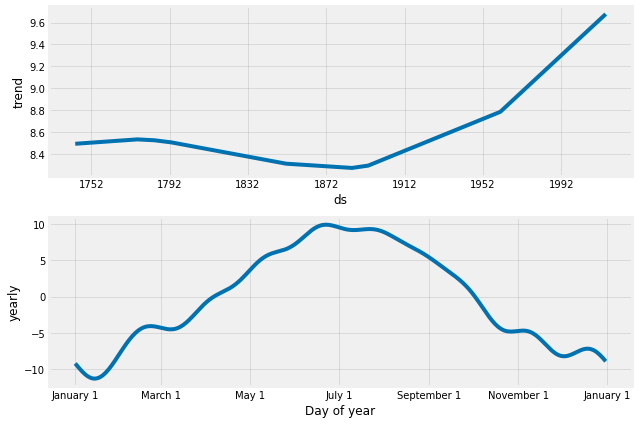

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

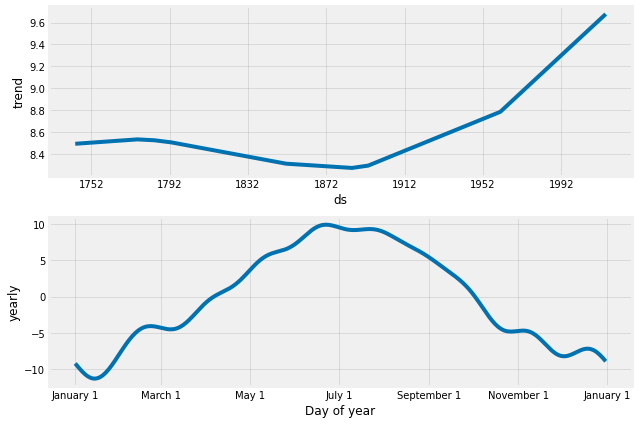

In [ ]:
fig4 = m.plot_components(forecast)

In [ ]:
df5= merge_df.loc[merge_df.City =='Toulouse']
df5

dt  AverageTemperature  ...  Latitude Longitude
7722259  1743-11-01               7.084  ...    44.20N     2.24E
7722260  1743-12-01                 NaN  ...    44.20N     2.24E
7722261  1744-01-01                 NaN  ...    44.20N     2.24E
7722262  1744-02-01                 NaN  ...    44.20N     2.24E
7722263  1744-03-01                 NaN  ...    44.20N     2.24E
...             ...                 ...  ...       ...       ...
7725493  2013-05-01              11.291  ...    44.20N     2.24E
7725494  2013-06-01              16.341  ...    44.20N     2.24E
7725495  2013-07-01              21.517  ...    44.20N     2.24E
7725496  2013-08-01              19.711  ...    44.20N     2.24E
7725497  2013-09-01                 NaN  ...    44.20N     2.24E

[3239 rows x 7 columns]

In [ ]:
df5['dt'] = pd.DatetimeIndex(df5['dt'])
df5.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df5= df5.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df5

ds       y  ...  Latitude Longitude
7722259 1743-11-01   7.084  ...    44.20N     2.24E
7722260 1743-12-01     NaN  ...    44.20N     2.24E
7722261 1744-01-01     NaN  ...    44.20N     2.24E
7722262 1744-02-01     NaN  ...    44.20N     2.24E
7722263 1744-03-01     NaN  ...    44.20N     2.24E
...            ...     ...  ...       ...       ...
7725493 2013-05-01  11.291  ...    44.20N     2.24E
7725494 2013-06-01  16.341  ...    44.20N     2.24E
7725495 2013-07-01  21.517  ...    44.20N     2.24E
7725496 2013-08-01  19.711  ...    44.20N     2.24E
7725497 2013-09-01     NaN  ...    44.20N     2.24E

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(df5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  17.683617   15.986590   19.555078
3595 2014-08-24  17.575098   15.841700   19.200807
3596 2014-08-25  17.465953   15.667003   19.134241
3597 2014-08-26  17.356288   15.575546   19.127701
3598 2014-08-27  17.246244   15.401301   18.957978

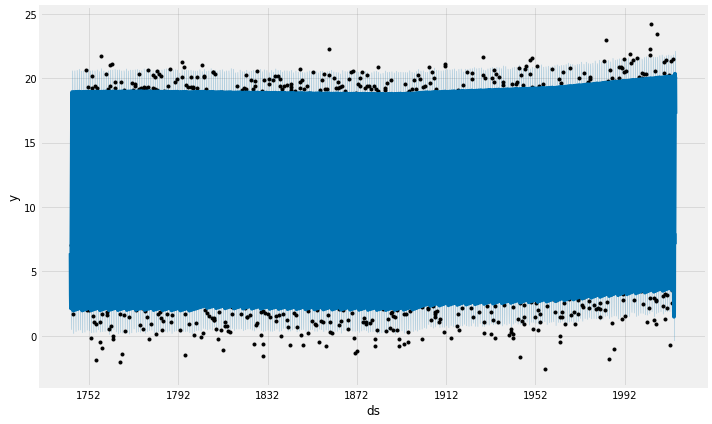

In [ ]:
fig5= m.plot(forecast)

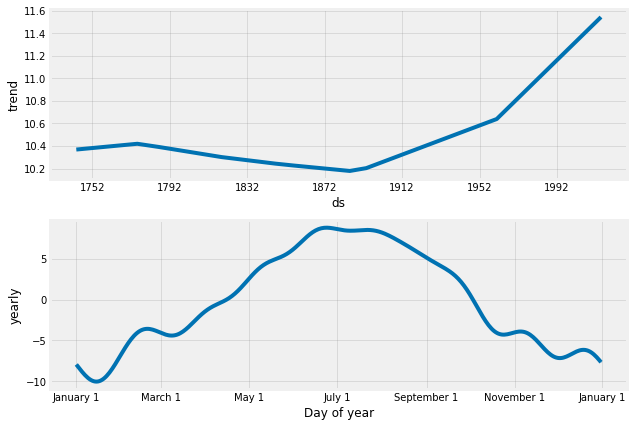

In [ ]:
fig5 = m.plot_components(forecast)

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3594 2014-08-23  17.683617   15.953937   19.507419
3595 2014-08-24  17.575098   15.924565   19.363856
3596 2014-08-25  17.465953   15.644980   19.092663
3597 2014-08-26  17.356288   15.579104   19.103501
3598 2014-08-27  17.246244   15.692324   18.967461

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
df6= merge_df.loc[merge_df.City =='Marseille']
df6

dt  AverageTemperature  ...  Latitude Longitude
4669921  1743-11-01              13.857  ...    42.59N     6.55E
4669922  1743-12-01                 NaN  ...    42.59N     6.55E
4669923  1744-01-01                 NaN  ...    42.59N     6.55E
4669924  1744-02-01                 NaN  ...    42.59N     6.55E
4669925  1744-03-01                 NaN  ...    42.59N     6.55E
...             ...                 ...  ...       ...       ...
4673155  2013-05-01              15.330  ...    42.59N     6.55E
4673156  2013-06-01              19.582  ...    42.59N     6.55E
4673157  2013-07-01              24.093  ...    42.59N     6.55E
4673158  2013-08-01              23.993  ...    42.59N     6.55E
4673159  2013-09-01                 NaN  ...    42.59N     6.55E

[3239 rows x 7 columns]

In [ ]:
df6['dt'] = pd.DatetimeIndex(df6['dt'])
df6.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df6= df6.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df6

ds       y  ...  Latitude Longitude
4669921 1743-11-01  13.857  ...    42.59N     6.55E
4669922 1743-12-01     NaN  ...    42.59N     6.55E
4669923 1744-01-01     NaN  ...    42.59N     6.55E
4669924 1744-02-01     NaN  ...    42.59N     6.55E
4669925 1744-03-01     NaN  ...    42.59N     6.55E
...            ...     ...  ...       ...       ...
4673155 2013-05-01  15.330  ...    42.59N     6.55E
4673156 2013-06-01  19.582  ...    42.59N     6.55E
4673157 2013-07-01  24.093  ...    42.59N     6.55E
4673158 2013-08-01  23.993  ...    42.59N     6.55E
4673159 2013-09-01     NaN  ...    42.59N     6.55E

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(df6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

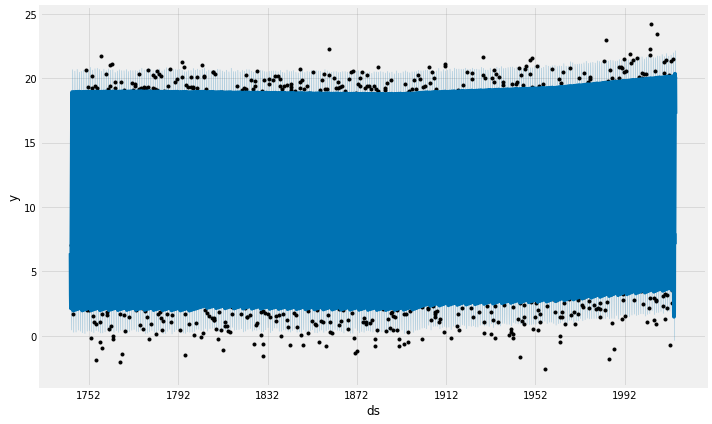

In [ ]:
fig6= m.plot(forecast)

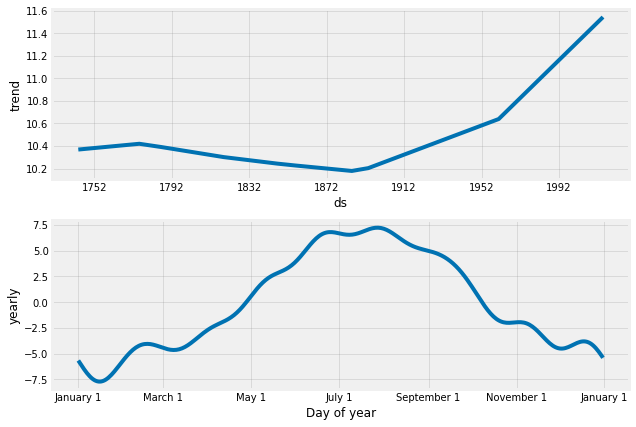

In [ ]:
fig6 = m.plot_components(forecast)

In [ ]:
df7= merge_df.loc[merge_df.City =='Bordeaux']
df7

dt  AverageTemperature  ...  Latitude Longitude
1048085  1743-11-01               8.422  ...    44.20N     0.00W
1048086  1743-12-01                 NaN  ...    44.20N     0.00W
1048087  1744-01-01                 NaN  ...    44.20N     0.00W
1048088  1744-02-01                 NaN  ...    44.20N     0.00W
1048089  1744-03-01                 NaN  ...    44.20N     0.00W
...             ...                 ...  ...       ...       ...
1051319  2013-05-01              12.847  ...    44.20N     0.00W
1051320  2013-06-01              17.440  ...    44.20N     0.00W
1051321  2013-07-01              22.881  ...    44.20N     0.00W
1051322  2013-08-01              20.887  ...    44.20N     0.00W
1051323  2013-09-01                 NaN  ...    44.20N     0.00W

[3239 rows x 7 columns]

In [ ]:
df7['dt'] = pd.DatetimeIndex(df7['dt'])
df7.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df7= df7.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df7

ds       y  ...  Latitude Longitude
1048085 1743-11-01   8.422  ...    44.20N     0.00W
1048086 1743-12-01     NaN  ...    44.20N     0.00W
1048087 1744-01-01     NaN  ...    44.20N     0.00W
1048088 1744-02-01     NaN  ...    44.20N     0.00W
1048089 1744-03-01     NaN  ...    44.20N     0.00W
...            ...     ...  ...       ...       ...
1051319 2013-05-01  12.847  ...    44.20N     0.00W
1051320 2013-06-01  17.440  ...    44.20N     0.00W
1051321 2013-07-01  22.881  ...    44.20N     0.00W
1051322 2013-08-01  20.887  ...    44.20N     0.00W
1051323 2013-09-01     NaN  ...    44.20N     0.00W

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(df7)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

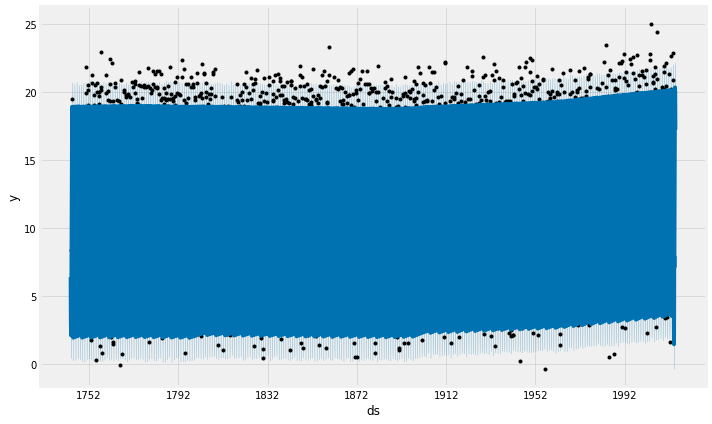

In [ ]:
fig7= m.plot(forecast)

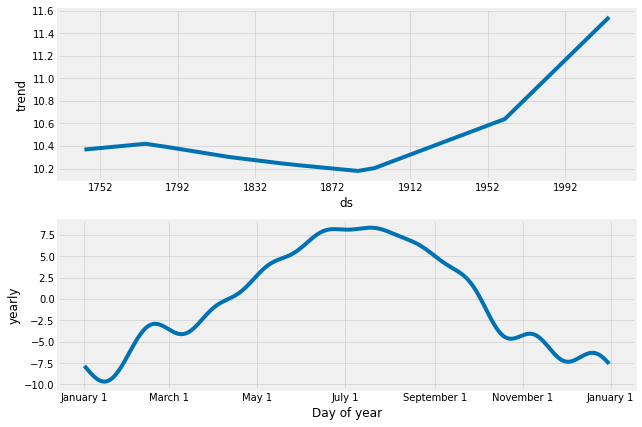

In [ ]:
fig7 = m.plot_components(forecast)

In [ ]:
df8= merge_df.loc[merge_df.City =='Lille']
df8

dt  AverageTemperature  ...  Latitude Longitude
4256076  1743-11-01               7.520  ...    50.63N     3.80E
4256077  1743-12-01                 NaN  ...    50.63N     3.80E
4256078  1744-01-01                 NaN  ...    50.63N     3.80E
4256079  1744-02-01                 NaN  ...    50.63N     3.80E
4256080  1744-03-01                 NaN  ...    50.63N     3.80E
...             ...                 ...  ...       ...       ...
4259310  2013-05-01              11.788  ...    50.63N     3.80E
4259311  2013-06-01              15.918  ...    50.63N     3.80E
4259312  2013-07-01              20.023  ...    50.63N     3.80E
4259313  2013-08-01              18.690  ...    50.63N     3.80E
4259314  2013-09-01                 NaN  ...    50.63N     3.80E

[3239 rows x 7 columns]

In [ ]:
df8['dt'] = pd.DatetimeIndex(df8['dt'])
df8.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [ ]:
df8= df8.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df8

ds       y  ...  Latitude Longitude
4256076 1743-11-01   7.520  ...    50.63N     3.80E
4256077 1743-12-01     NaN  ...    50.63N     3.80E
4256078 1744-01-01     NaN  ...    50.63N     3.80E
4256079 1744-02-01     NaN  ...    50.63N     3.80E
4256080 1744-03-01     NaN  ...    50.63N     3.80E
...            ...     ...  ...       ...       ...
4259310 2013-05-01  11.788  ...    50.63N     3.80E
4259311 2013-06-01  15.918  ...    50.63N     3.80E
4259312 2013-07-01  20.023  ...    50.63N     3.80E
4259313 2013-08-01  18.690  ...    50.63N     3.80E
4259314 2013-09-01     NaN  ...    50.63N     3.80E

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(df8)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

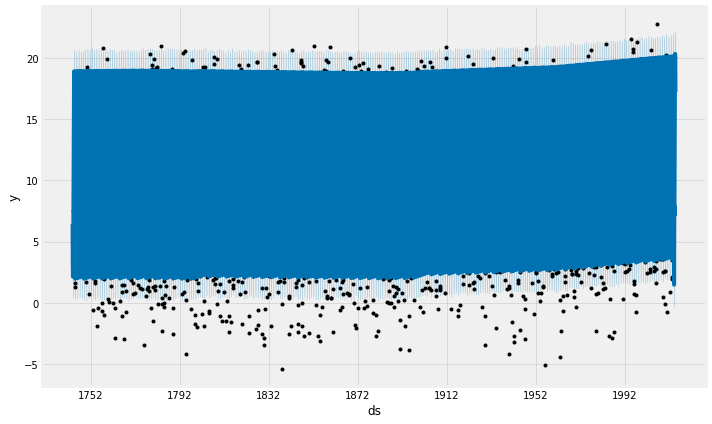

In [ ]:
fig8= m.plot(forecast)

In [ ]:
df9 =merge_df.loc[merge_df.City =='Montpellier']
df9

dt  AverageTemperature  ...  Latitude Longitude
4914629  1743-11-01               7.478  ...    44.20N     4.47E
4914630  1743-12-01                 NaN  ...    44.20N     4.47E
4914631  1744-01-01                 NaN  ...    44.20N     4.47E
4914632  1744-02-01                 NaN  ...    44.20N     4.47E
4914633  1744-03-01                 NaN  ...    44.20N     4.47E
...             ...                 ...  ...       ...       ...
4917863  2013-05-01              12.811  ...    44.20N     4.47E
4917864  2013-06-01              18.258  ...    44.20N     4.47E
4917865  2013-07-01              23.178  ...    44.20N     4.47E
4917866  2013-08-01              21.599  ...    44.20N     4.47E
4917867  2013-09-01                 NaN  ...    44.20N     4.47E

[3239 rows x 7 columns]

In [ ]:
df9= df9.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df9

ds       y  ...  Latitude Longitude
4914629  1743-11-01   7.478  ...    44.20N     4.47E
4914630  1743-12-01     NaN  ...    44.20N     4.47E
4914631  1744-01-01     NaN  ...    44.20N     4.47E
4914632  1744-02-01     NaN  ...    44.20N     4.47E
4914633  1744-03-01     NaN  ...    44.20N     4.47E
...             ...     ...  ...       ...       ...
4917863  2013-05-01  12.811  ...    44.20N     4.47E
4917864  2013-06-01  18.258  ...    44.20N     4.47E
4917865  2013-07-01  23.178  ...    44.20N     4.47E
4917866  2013-08-01  21.599  ...    44.20N     4.47E
4917867  2013-09-01     NaN  ...    44.20N     4.47E

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(df9)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

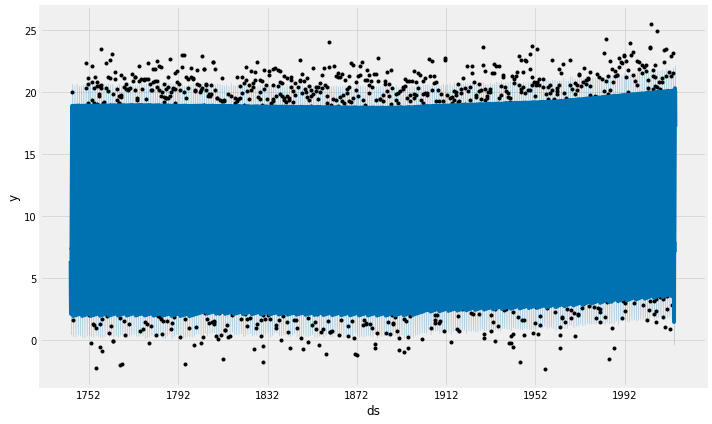

In [ ]:
fig9= m.plot(forecast)

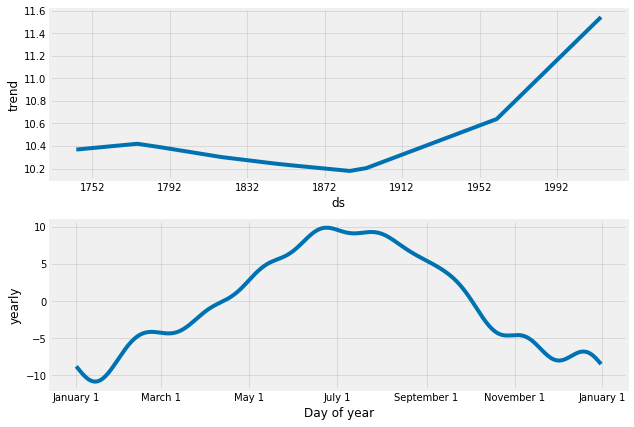

In [ ]:
fig9 = m.plot_components(forecast)

In [ ]:
dfReims =merge_df.loc[merge_df.City =='Reims']
dfReims

dt  AverageTemperature  ...  Latitude Longitude
6303953  1743-11-01               6.836  ...    49.03N     4.90E
6303954  1743-12-01                 NaN  ...    49.03N     4.90E
6303955  1744-01-01                 NaN  ...    49.03N     4.90E
6303956  1744-02-01                 NaN  ...    49.03N     4.90E
6303957  1744-03-01                 NaN  ...    49.03N     4.90E
...             ...                 ...  ...       ...       ...
6307187  2013-05-01              11.597  ...    49.03N     4.90E
6307188  2013-06-01              16.505  ...    49.03N     4.90E
6307189  2013-07-01              21.139  ...    49.03N     4.90E
6307190  2013-08-01              18.929  ...    49.03N     4.90E
6307191  2013-09-01                 NaN  ...    49.03N     4.90E

[3239 rows x 7 columns]

In [ ]:
dfReims=dfReims.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
dfReims

ds       y  ...  Latitude Longitude
6303953  1743-11-01   6.836  ...    49.03N     4.90E
6303954  1743-12-01     NaN  ...    49.03N     4.90E
6303955  1744-01-01     NaN  ...    49.03N     4.90E
6303956  1744-02-01     NaN  ...    49.03N     4.90E
6303957  1744-03-01     NaN  ...    49.03N     4.90E
...             ...     ...  ...       ...       ...
6307187  2013-05-01  11.597  ...    49.03N     4.90E
6307188  2013-06-01  16.505  ...    49.03N     4.90E
6307189  2013-07-01  21.139  ...    49.03N     4.90E
6307190  2013-08-01  18.929  ...    49.03N     4.90E
6307191  2013-09-01     NaN  ...    49.03N     4.90E

[3239 rows x 7 columns]

In [ ]:
 m = Prophet()
m.fit(dfReims)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=360)
future.tail()

ds
3594 2014-08-23
3595 2014-08-24
3596 2014-08-25
3597 2014-08-26
3598 2014-08-27

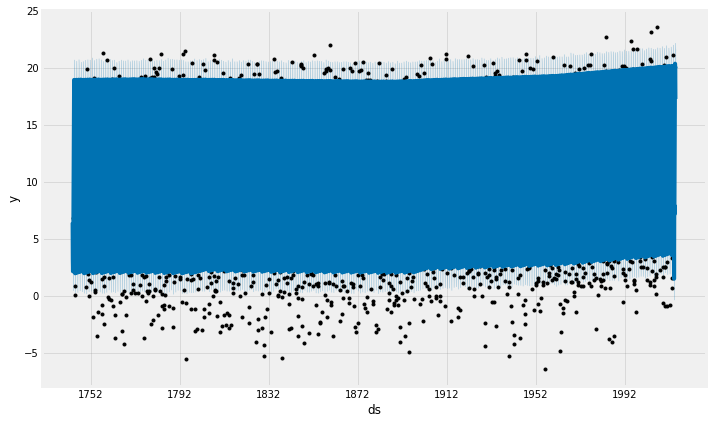

In [ ]:
fig10= m.plot(forecast)

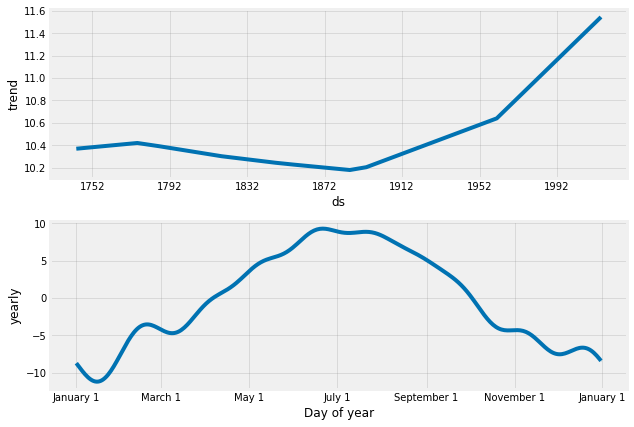

In [ ]:
fig10 = m.plot_components(forecast)